In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

def polar_to_cartesian(r, theta, vr, vtheta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    vx = vr * np.cos(theta) - vtheta * np.sin(theta)
    vy = vr * np.sin(theta) + vtheta * np.cos(theta)

    return np.array([x, y, vx, vy])


def cartesian_to_polar(x, y, vx, vy):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    vr = vx*np.cos(theta) + vy*np.sin(theta)
    vtheta = - vx*np.sin(theta) + vy*np.cos(theta) 
    
    return np.array([r, theta, vr, vtheta])


a = polar_to_cartesian(3,-np.pi/4,420,69)
cartesian_to_polar(a[0], a[1], a[2], a[3])

array([   3.        ,   -0.78539816,  420.        ,   69.        ])

In [29]:
def cartesian_to_polar_position(x,y):
    return np.sqrt(x**2 + y**2), np.arctan2(y,x)

def cartesian_to_polar_velocity(theta,vx,vy):
    vr = np.sqrt(vx**2 + vy**2) * np.cos(theta) # by differentiating r wrt t
    vtheta = (x*vy - y*vx)/(x**2 + y**2) # by differentiating theta wrt t

In [69]:







# Global constants for earth
G = 6.6742*10**-11 # gravitational constant, Nm^2/kg^2
M = 5.9722*10**24 # mass of earth, kg
R = 6371*10**3 # radius of earth, m

# Global constants for rocket
m = 1
A = 1
C_d = 1

def force_gravity(m, r):
    # force magnitude
    F_g = G*M*m/(R+r)**2
    
    return F_g

def air_density(r):

    rho_0 = 1.225 # sea level density, kg/m^3
    L = 0.0065 # temperature lapse rate, K/m
    T = 288.15 # temperature, K. Temperature is obviously NOT constant and this is a simplification
    M = 0.0289644 # molar mass of dry air, kg/mol
    R_gas = 8.31447 # ideal gas constant, J/(mol K)
    g = force_gravity(m, r)/m # acceleration due to gravity at (x, y) in x and y directions [m/s^2]

    rho = rho_0 * np.exp(-g*M*(r-R)/(R_gas*T))

    return rho

def force_drag(r, vr, vtheta):
    rho = air_density(r)
    
    b = 1/(2*m) * rho * A * C_d

    F_drag_r = b*np.sqrt(vr**2 + vtheta**2)*vr
    F_drag_theta = b*np.sqrt(vr**2 + vtheta**2)*vtheta

    return F_drag_r, F_drag_theta

def acceleration(r, vr, vtheta):
    F_g_r = force_gravity(m, r)
    F_drag_r, F_drag_theta = force_drag(r, vr, vtheta)
    #F_T_x, F_T_y = force_thrust(t, x, y)
    
    F_net_r = (-F_g_r - F_drag_r)/m
    F_net_theta = (-F_drag_theta)/m

    return F_net_r, F_net_theta

def F4(init, t):
    r, theta = init[0], init[1]
    vr, vtheta = init[2], init[3]
    ar, atheta = acc(r, vr, vtheta)
    
    return np.array([vr, vtheta, ar, atheta])


def print_init(init):
    print('INITIAL CONDITIONS')
    print('r =', init[0])
    print('theta =', init[1])
    print('vr =', init[2])
    print('vtheta =', init[3])
    
def acc(r, vr, vtheta):
    return -force_gravity(m,r)/m, 0


def F4(init, t):
    r, theta = init[0], init[1]
    vr, vtheta = init[2], init[3]
    ar, atheta = acc(r, vr, vtheta)
    
    return np.array([vr, vtheta, ar, atheta])
    
    

INITIAL CONDITIONS
r = 6621000.0
theta = 1.57079632679
vr = 0.0
vtheta = 7900.0


C:\Users\Nicholas\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


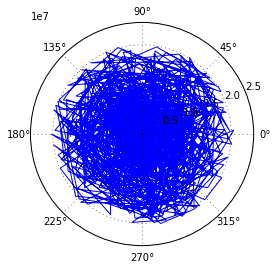

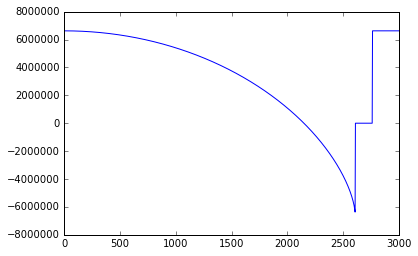

In [74]:
def test_F4(init, t_max, N):
    T = np.linspace(0, t_max, N)
    
    data = odeint(F4, init, T)
    r, theta, vr, vtheta = data[:,0], data[:, 1], data[:,2], data[:,3]
    
    #print(x[-1], y[-1], np.sqrt(x[-1]**2 + y[-1]**2))
    #print(vx[-1], vy[-1])

    plt.subplot(111, projection='polar')
    plt.plot(r, theta)
    plt.show()
    
    plt.plot(T, r)
    
    return None

    plt.figure(figsize=(20,3))
    
    plt.subplot(1,3,1)
    plt.plot(x, y)
    plt.title('Trajectory')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.plot(0, 0, 'ro')
    
    earth = plt.Circle((0,0), R, color='green')
    plt.subplot(1,3,1).add_patch(earth)

    return None
    plt.subplot(1,3,2)
    plt.plot(T, x)
    plt.title('x vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')

    plt.subplot(1,3,3)
    plt.plot(T, y)
    plt.title('y vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.show()
    
    plt.figure(figsize=(20,3))
    
    plt.subplot(1,2,1)
    plt.plot(T, vx)
    plt.title('vx vs t')
    plt.xlabel('t (s)')
    plt.ylabel('vx (m/s)')
    
    plt.subplot(1,2,2)
    plt.plot(T, vy)
    plt.title('vy vs t')
    plt.xlabel('t (s)')
    plt.ylabel('vy (m/s)')
    
    plt.show()
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca(projection='3d')
    
    z = np.zeros_like(x)
    #z = np.array(range(N))
    ax.plot(x, y, z, 'm')
    ax.plot([x[0]], [y[0]], [z[0]], 'bo', label='inital position')
    ax.plot([x[-1]], [y[-1]], [z[-1]], 'ro', label='final position')
    plt.legend(loc='best')
    
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
    X = R*np.cos(u)*np.sin(v)
    Y = R*np.sin(u)*np.sin(v)
    Z = R*np.cos(v)
    ax.plot_wireframe(X, Y, Z, color="green")
    
    
    max_limit = max(np.max(x), np.max(y), np.max(z))
    ax.set_xlim(-max_limit, max_limit)
    ax.set_ylim(-max_limit, max_limit)
    ax.set_zlim(-max_limit, max_limit)
    
    plt.title('3D Trajectory Plot')

    plt.show()
    
def plot_test_F4():
    G = 6.6742*10**-11 # gravitational constant, Nm^2/kg^2
    M = 5.9722*10**24 # mass of earth, kg
    R = 6371*10**3 # radius of earth, m
    
    y = R + 250e3
    v0 = np.sqrt(G*M)/(0 + (y)**2)**(1/4)
    
    init1 = np.array([y, np.pi/2, 0, 7900])
    
    print_init(init1)
    test_F4(init1, 3000, 1000)
    
plot_test_F4()